In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re 
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('netflix1.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
df.shape

(8790, 10)

In [4]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
df['director'].value_counts()

director
Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: count, Length: 4528, dtype: int64

In [10]:
df['director'].replace('Not Given',np.nan,inplace=True)
df['country'].replace('Not Given',np.nan,inplace=True)

In [12]:
print(df['director'].isnull().sum())
print(df['country'].isnull().sum())

2588
287


In [13]:
df.dropna(inplace = True)
df.shape

(5915, 10)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5915 entries, 0 to 6569
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5915 non-null   object
 1   type          5915 non-null   object
 2   title         5915 non-null   object
 3   director      5915 non-null   object
 4   country       5915 non-null   object
 5   date_added    5915 non-null   object
 6   release_year  5915 non-null   int64 
 7   rating        5915 non-null   object
 8   duration      5915 non-null   object
 9   listed_in     5915 non-null   object
dtypes: int64(1), object(9)
memory usage: 508.3+ KB


In [15]:
df['date_added']=pd.to_datetime(df['date_added'],errors = 'coerce')

In [16]:
df['type']=df['type'].astype('category')
df['country']=df['country'].astype('category')

In [17]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [18]:
df.duplicated().value_counts()

False    5915
Name: count, dtype: int64

In [19]:
type_counts = df['type'].value_counts()
print(type_counts)

type
Movie      5696
TV Show     219
Name: count, dtype: int64


Text(0.5, 0.98, 'Total Content on Netflix')

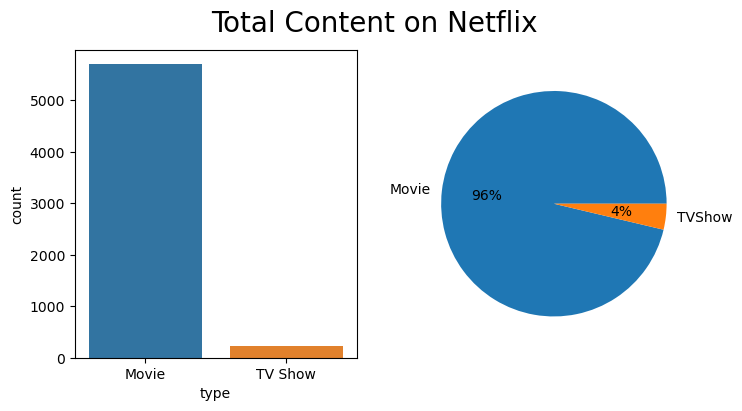

In [20]:
fig,axes=plt.subplots(1,2,figsize=(8,4))
sns.countplot(df,x=df['type'],ax=axes[0])
plt.pie(type_counts,labels=['Movie','TVShow'],autopct='%.0f%%')
plt.suptitle('Total Content on Netflix',fontsize=20)

In [21]:
df['genres']=df['listed_in'].apply(lambda x: x.split(','))

In [22]:
df['genres'] = df['genres'].apply(lambda x: [item.lstrip() for item in x])
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries]
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV Ac..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International Mov..."


In [23]:
all_genres = sum(df['genres'],[])
all_genres

['Documentaries',
 'Crime TV Shows',
 'International TV Shows',
 'TV Action & Adventure',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'Children & Family Movies',
 'Comedies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'British TV Shows',
 'Reality TV',
 'Comedies',
 'Dramas',
 'Children & Family Movies',
 'Comedies',
 'Music & Musicals',
 'Dramas',
 'International Movies',
 'Children & Family Movies',
 'Music & Musicals',
 'Children & Family Movies',
 'Comedies',
 'Children & Family Movies',
 'Comedies',
 'Movies',
 'Movies',
 'Movies',
 'Comedies',
 'Children & Family Movies',
 "Kids' TV",
 "Kids' TV",
 "Kids' TV",
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'Children & Family Movies',
 'Comedies',
 'International Movies',
 'Romantic Movies',
 'Comedies',
 'Horror Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Comedies',
 'International Movies',
 'Music & Musicals',
 'Action & Adventure',
 'Dramas',
 'International TV Shows',
 'Romantic TV Shows',
 

In [24]:
count_genres = pd.Series(all_genres).value_counts().head(10)
count_genres

International Movies        2558
Dramas                      2330
Comedies                    1593
Action & Adventure           815
Documentaries                762
Independent Movies           742
Romantic Movies              588
Children & Family Movies     559
Thrillers                    558
Horror Movies                344
Name: count, dtype: int64

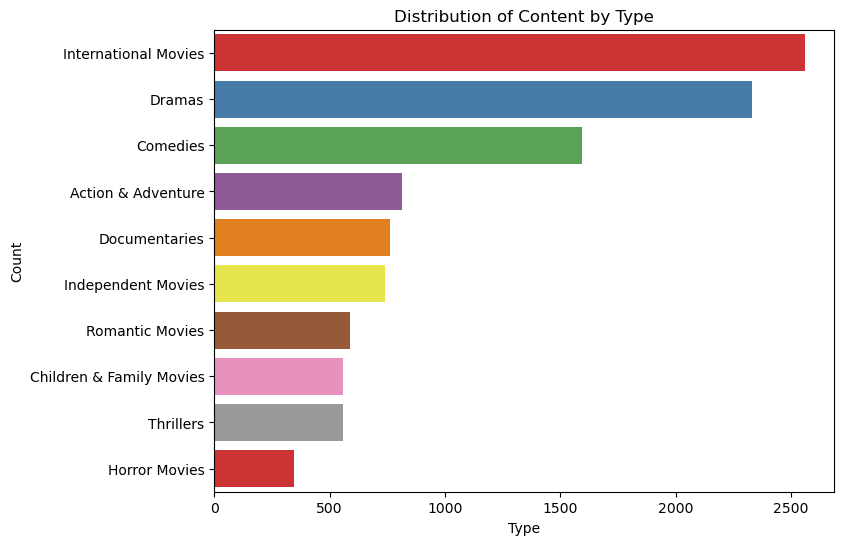

In [25]:
plt.figure(figsize=(8, 6))
sns.barplot(x=count_genres.values,y=count_genres.index,palette='Set1')
y=type_counts.values,
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [26]:
df['year_added']= df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year_added,month_added
6565,s3351,Movie,True: Grabbleapple Harvest,"Mark Thornton, Todd Kauffman",Canada,2019-11-01,2019,TV-Y,24 min,Children & Family Movies,[Children & Family Movies],2019,11
6566,s3509,Movie,True: Tricky Treat Day,"Mark Thornton, Todd Kauffman",Canada,2019-09-20,2019,TV-Y,24 min,Children & Family Movies,[Children & Family Movies],2019,9
6567,s3554,TV Show,True and the Rainbow Kingdom,"Mark Thornton, Todd Kauffman",United States,2019-08-30,2019,TV-Y,3 Seasons,Kids' TV,[Kids' TV],2019,8
6568,s4241,Movie,Sam Kinison: The Scream Continues,Walter C. Miller,United States,2018-12-31,2016,TV-MA,29 min,Documentaries,[Documentaries],2018,12
6569,s1315,TV Show,Chappelle's Show,Stan Lathan,United States,2021-02-12,2005,TV-MA,2 Seasons,TV Comedies,[TV Comedies],2021,2


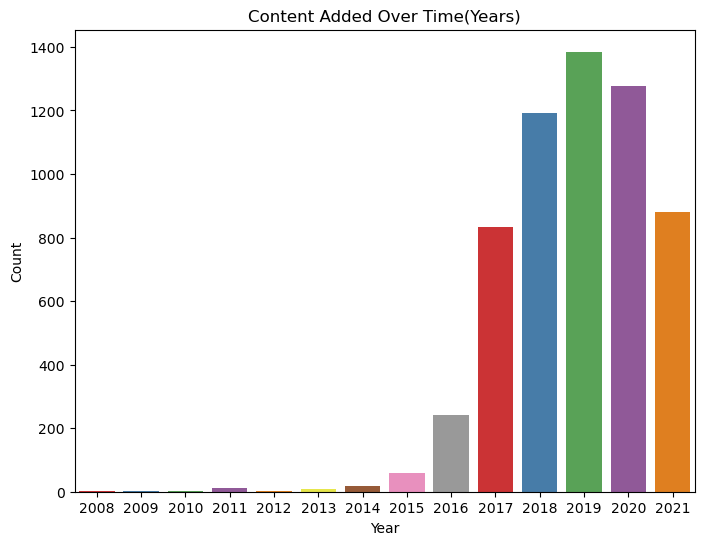

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x='year_added',data=df,palette='Set1')
plt.title('Content Added Over Time(Years)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [28]:
top_directors=df['director'].value_counts().head(10)
top_directors

director
Rajiv Chilaka             20
Alastair Fothergill       18
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Name: count, dtype: int64

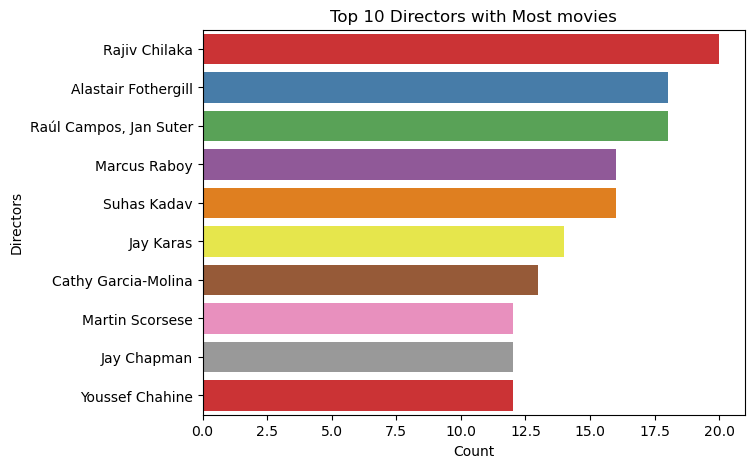

In [29]:
plt.figure(figsize=(7, 5))
sns.barplot(x=top_directors.values.astype(int),y=top_directors.index,palette='Set1')
plt.title('Top 10 Directors with Most movies')
plt.ylabel('Directors')
plt.xlabel('Count')
plt.show()

In [30]:
ratings = df['rating'].value_counts().reset_index().sort_values(by='count',ascending = False)
ratings

,rating,count
0,TV-MA,2029
1,TV-14,1368
2,R,787
3,TV-PG,521
4,PG-13,486
5,PG,281
6,TV-G,112
7,TV-Y7,108
8,TV-Y,99
9,NR,75


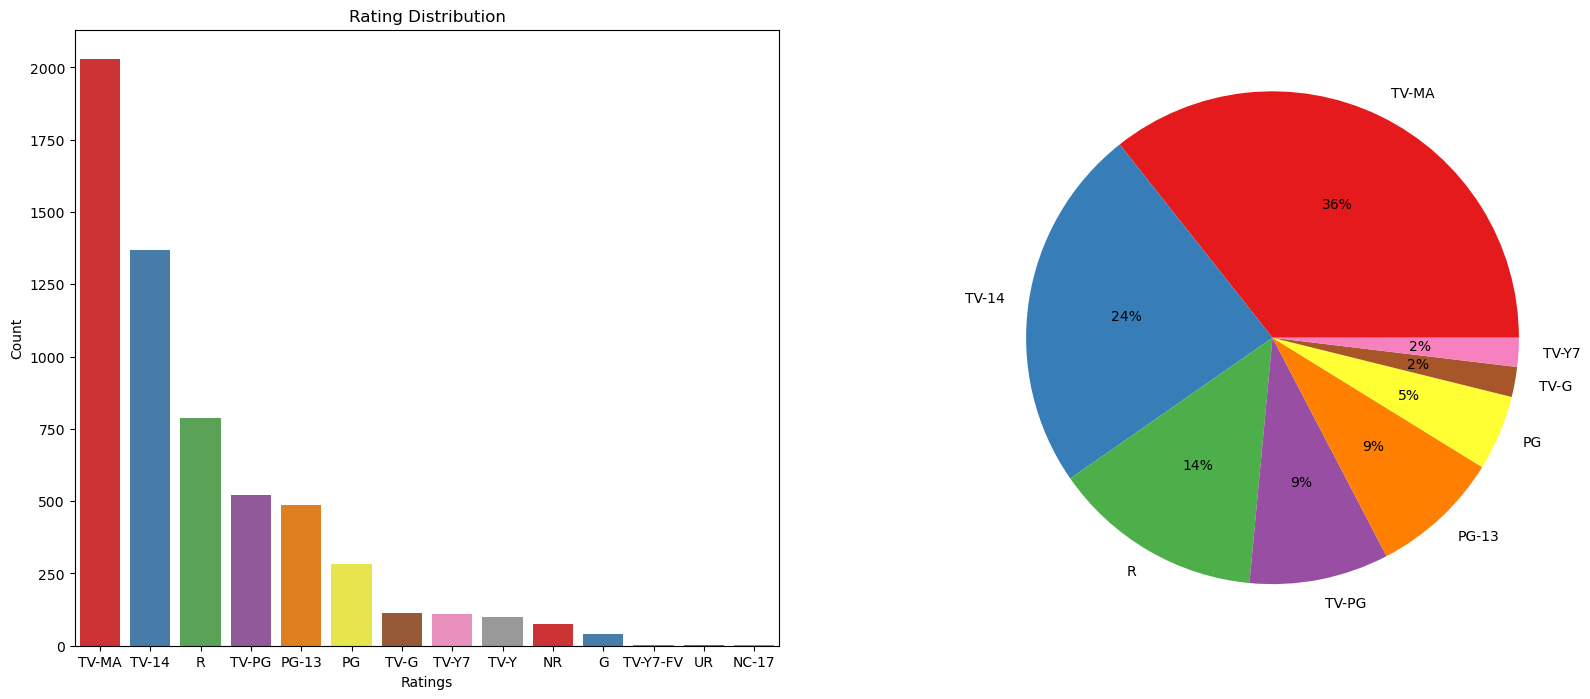

In [31]:
plt.figure(figsize=(20,8))
color = sns.color_palette('Set1')

plt.subplot(1,2,1)
sns.barplot(x=ratings['rating'],y=ratings['count'],palette = 'Set1')
plt.title('Rating Distribution')
plt.ylabel('Count')
plt.xlabel('Ratings')

plt.subplot(1,2,2)
plt.pie(ratings['count'][:8],labels=ratings['rating'][:8],autopct='%.0f%%',colors = color)
# plt.tight_layout()
plt.show()

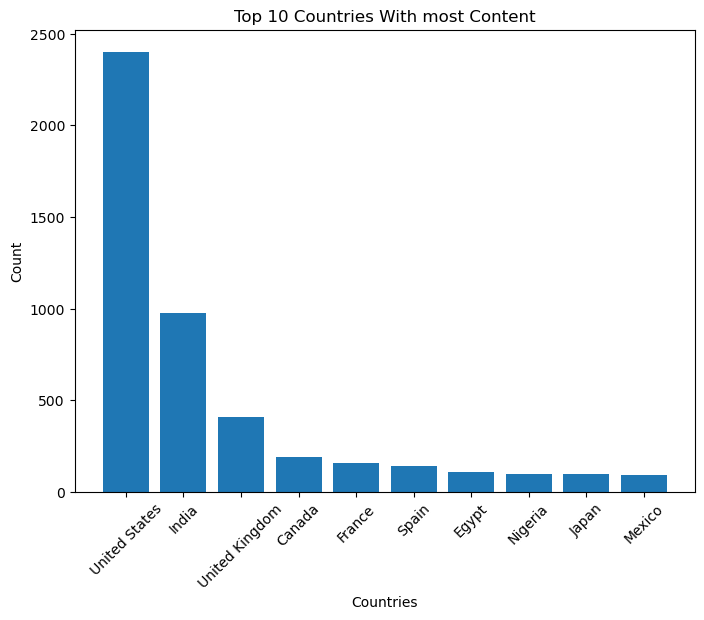

In [53]:
top_country = df['country'].value_counts().head(10)
top_country

plt.figure(figsize=(8,6))
plt.bar(top_country.index,top_country.values)
plt.title('Top 10 Countries With most Content')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

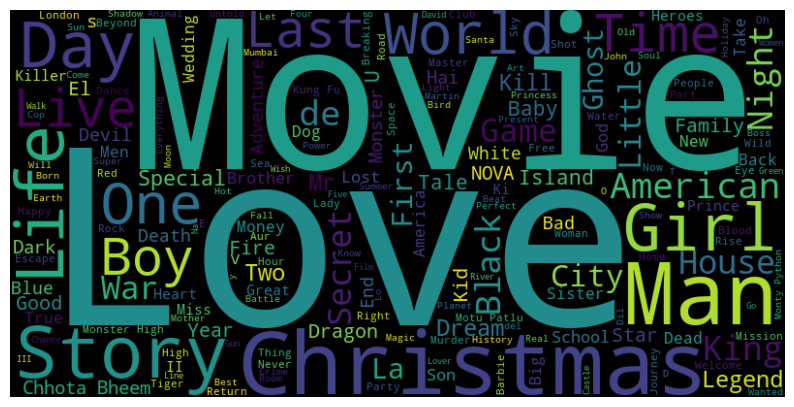

In [54]:
movie_titles = df[df['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()